In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv('fashion-mnist_test.csv')

In [3]:
fashion_train.shape

(60000, 785)

In [4]:
X_train_fashion=fashion_train.drop('label',axis=1)
y_train_fashion=fashion_train['label']
X_test_fashion=fashion_test.drop('label',axis=1)
y_test_fashion=fashion_test['label']

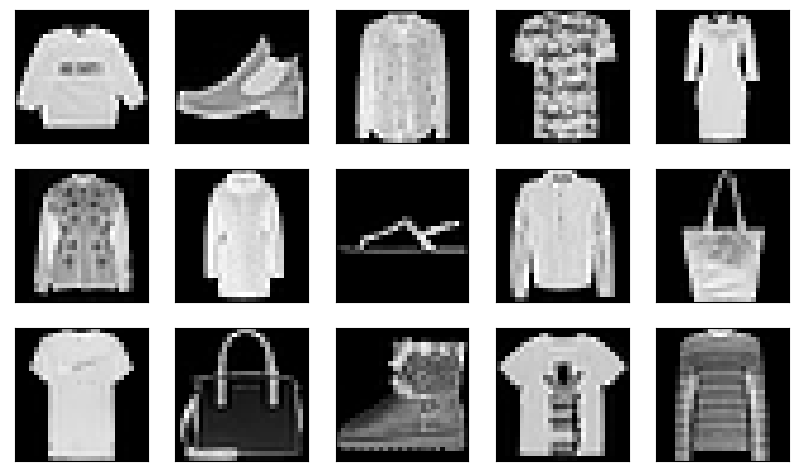

In [5]:
X_train_reshape=X_train_fashion.values.reshape(-1,28,28)
X_test_reshape=X_test_fashion.values.reshape(-1,28,28)
clo_names=['T-shirt/top','Trouser','Pullover','Dress','Cost','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_reshape[i],cmap='gray')
plt.show()
    

In [6]:
y_train_fashion=to_categorical(y_train_fashion,num_classes=10)
y_test_fashion=to_categorical(y_test_fashion,num_classes=10)

In [7]:
model=keras.Sequential([
    layers.Dense(128,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history=model.fit(X_train_fashion,y_train_fashion,batch_size=100,epochs=30,validation_data=(X_test_fashion,y_test_fashion))


Epoch 1/30
600/600 [==============================] - 9s 11ms/step - loss: 1.1102 - accuracy: 0.6322 - val_loss: 0.5571 - val_accuracy: 0.8214
Epoch 2/30
600/600 [==============================] - 5s 8ms/step - loss: 0.7269 - accuracy: 0.7542 - val_loss: 0.5038 - val_accuracy: 0.8463
Epoch 3/30
600/600 [==============================] - 5s 8ms/step - loss: 0.6619 - accuracy: 0.7747 - val_loss: 0.4524 - val_accuracy: 0.8543
Epoch 4/30
600/600 [==============================] - 5s 9ms/step - loss: 0.6284 - accuracy: 0.7871 - val_loss: 0.5685 - val_accuracy: 0.8357
Epoch 5/30
600/600 [==============================] - 6s 10ms/step - loss: 0.6043 - accuracy: 0.7982 - val_loss: 0.4722 - val_accuracy: 0.8521
Epoch 6/30
600/600 [==============================] - 5s 9ms/step - loss: 0.5859 - accuracy: 0.8042 - val_loss: 0.4236 - val_accuracy: 0.8607
Epoch 7/30
600/600 [==============================] - 5s 8ms/step - loss: 0.5732 - accuracy: 0.8085 - val_loss: 0.4293 - val_accuracy: 0.8639
Epoc

In [8]:
test_loss_fashion,test_acc_fashion=model.evaluate(X_test_fashion,y_test_fashion)

313/313 [==============================] - 2s 5ms/step - loss: 0.4058 - accuracy: 0.8746


In [9]:
print("Fashion MNIST Test accuracy:",round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8746


In [11]:
y_predict_fash=model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash,axis=1)
y_test_fash_eval=np.argmax(y_test_fashion,axis=1)

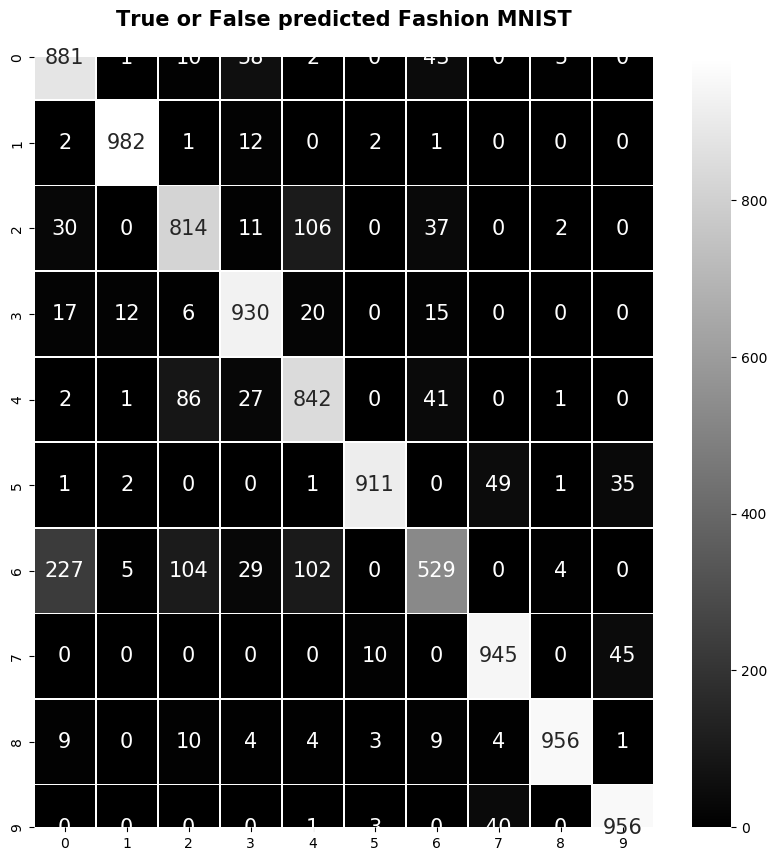

In [13]:
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='gray')
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1000
           1       0.98      0.98      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.87      0.93      0.90      1000
           4       0.78      0.84      0.81      1000
           5       0.98      0.91      0.94      1000
           6       0.78      0.53      0.63      1000
           7       0.91      0.94      0.93      1000
           8       0.99      0.96      0.97      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


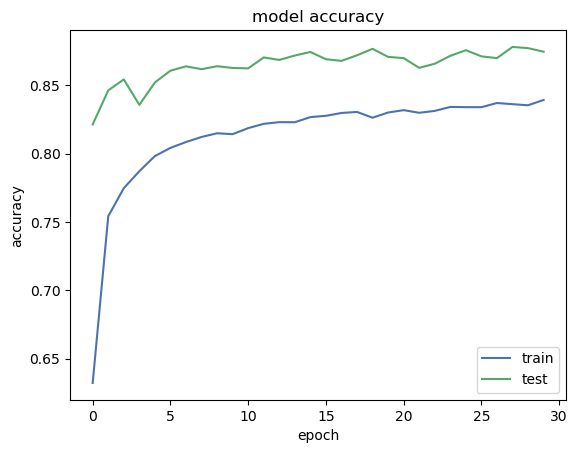

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='best')
plt.show()

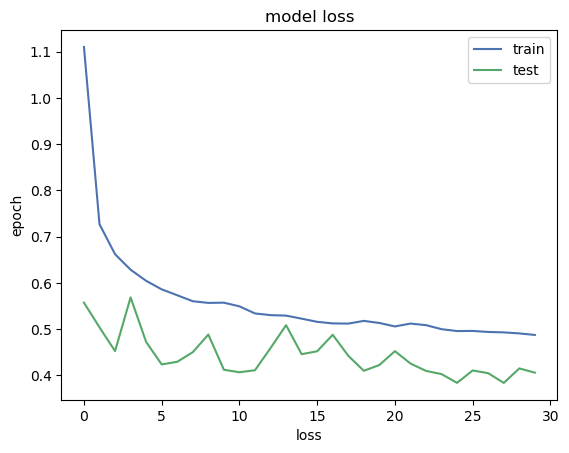

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [18]:
y_predict=model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict,axis=1)
y_test_digit_eval=np.argmax(y_test_fashion,axis=1)

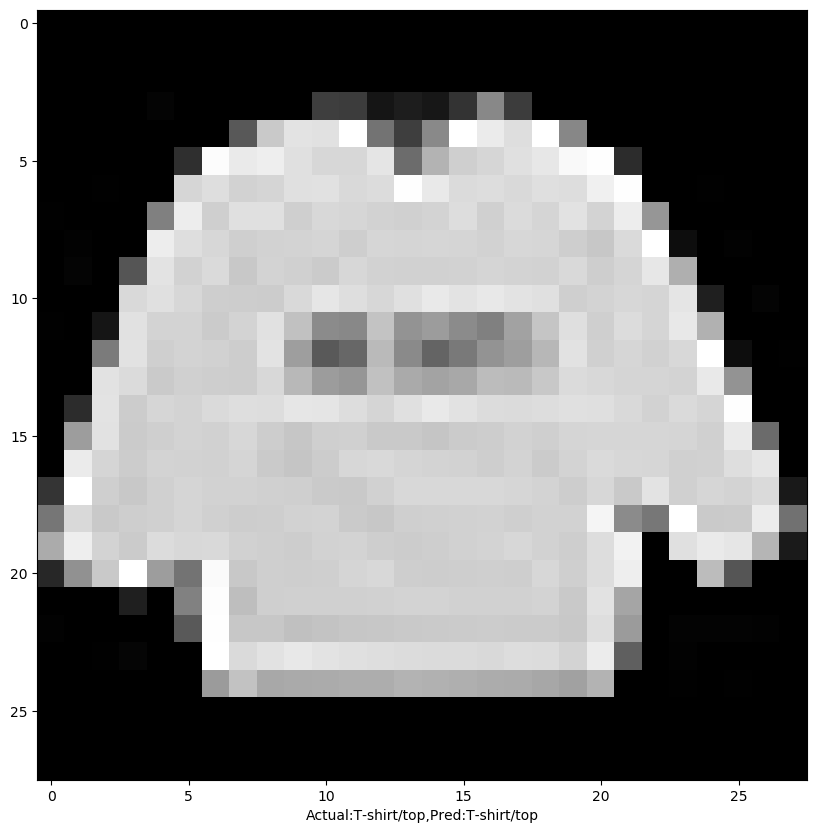

In [23]:
col_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(10,10))
plt.imshow(X_train_reshape[0],cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()